### <div style="text-align:center"><h1><font color='#e53d31'>OPPENHEIMER MOVIE - SENTIMENT ANALYSIS</font></h1></div>

## <font color='#e53d31'>About Movie</font>

### <font color='#e53d31'>"Oppenheimer"</font>, directed by the iconic Christopher Nolan, hit theaters on July 21, 2023.The movie is an epic account of J. Robert Oppenheimer, the father of the atomic bomb, who worked on the top-secret Manhattan Project during World War II. The cast includes Cillian Murphy, Matt Damon, Robert Downey Jr., Kai Bird, Christopher Nolan, and Martin J. Sherwin.

## <font color='#e53d31'> Purpose </font>
### Now, We will be gearing up for a Sentiment Analysis using <font color='#e53d31'>NLTK</font>, focusing on `IMDb` reviews. By analyzing ratings and reviews, we'll tap into the pulse of audience reactions toward "Oppenheimer."

## <font color='#e53d31'>Web scraping and analysis</font>

Python includes some packages for web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once we've collected the data and saved it into a local `.csv` file we will start analysis.

### Scraping data from IMDb

If we visit [https://www.imdb.com/?ref_=nv_home], we can see that there is a lot of data there. For this task, we are only interested in reviews related to Oppenheimer movie.

If we navigate to this link: [https://www.imdb.com/title/tt15398776/reviews/], we can see the data. Now, we will use `Python` and `BeautifulSoup` to collect all reviews and ratings.

# <font color='#e53d31'>1. Importing Libraries and Data</font>

In [1]:
import pandas as pd # data preprocessing (I/O)
import numpy as np # linear algebra

import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

import requests # retrieving data from URLs
from bs4 import BeautifulSoup # Web Scraping

from warnings import filterwarnings
filterwarnings('ignore')

## <font color='#e53d31'>1.1. Web Scraping using BeautifulSoup</font>

In [2]:
url = ("https://www.imdb.com/title/tt15398776/reviews/_ajax?ref_=undefined&paginationKey={}")
key = "g4xojermtizcsyif7cthzmrtqpummbj62mkt74pqcwb32w3dneq2kd23mjofnbe36xkiwmunqt4q4nmhfiady"
data = {"title": [], "rating" : [],"review": []}

while True:
    response = requests.get(url.format(key))
    soup = BeautifulSoup(response.content, "html.parser")
    # Find the pagination key
    pagination_key = soup.find("div", class_="load-more-data")
    if not pagination_key:
        break

    # Update the `key` variable in-order to scrape more reviews
    key = pagination_key["data-key"]
    for title,rating,review in zip(
        soup.find_all(class_="title"), soup.find_all(class_="rating-other-user-rating")
        , soup.find_all(class_="text show-more__control")
    ):
        data["title"].append(title.get_text(strip=True))
        data["rating"].append(rating.get_text())
        data["review"].append(review.get_text())

df = pd.DataFrame(data)
#print(df)
df

,title,rating,review
0,superior filmmaking and historical storytelling,\n\n\n\n\n\n9/10\n,Greetings again from the darkness. As pupils s...
1,A sheer Brilliance of Christopher Nolan,\n\n\n\n\n\n10/10\n,Dr. J Robert Oppenheimer the creator of Atomic...
2,Fission. Fusion. Oscars.,\n\n\n\n\n\n8/10\n,Everybody involved with the production of 'Opp...
3,"His eyes look full of fear, regrets and guilt!",\n\n\n\n\n\n10/10\n,Imagine a fire that you brought from the heave...
4,Nolan at his best!,\n\n\n\n\n\n9/10\n,As VFX and special effects take over the tradi...
...,...,...,...
2441,"Now, this film is directed by old Nolan. ðŸ˜²",\n\n\n\n\n\n6/10\n,"Well, as you know, nolan's mind can not think ..."
2442,Just another blockbuster :(,\n\n\n\n\n\n1/10\n,Cinematography in states is in crisis for deca...
2443,Tweaked,\n\n\n\n\n\n6/10\n,"I suppose these reviews are tweaked, otherwise..."
2444,Too bad,\n\n\n\n\n\n2/10\n,When there was nothing left to sell in the cin...


In [3]:
# Cleaning the 'rating' column and extracting numeric part
df['rating'] = df['rating'].str.strip()
df['rating'] = df['rating'].str.extract(r'(\d+)')  # Extract numeric part

# Converting to float dtype
df['rating'] = df['rating'].astype(float)  # Convert to float
df['rating'] = df['rating'].apply(lambda x: f'{x:.1f}')
df

,title,rating,review
0,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...
1,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...
2,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...
3,"His eyes look full of fear, regrets and guilt!",10.0,Imagine a fire that you brought from the heave...
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...
...,...,...,...
2441,"Now, this film is directed by old Nolan. ðŸ˜²",6.0,"Well, as you know, nolan's mind can not think ..."
2442,Just another blockbuster :(,1.0,Cinematography in states is in crisis for deca...
2443,Tweaked,6.0,"I suppose these reviews are tweaked, otherwise..."
2444,Too bad,2.0,When there was nothing left to sell in the cin...


In [4]:
# Saving the DataFrame to a CSV file named "IMDb_Openheimer_reviews.csv"
df.to_csv("Oppenheimer_IMDb_reviews.csv")

## <font color='#e53d31'>1.2. Working on Data</font>

In [5]:
# Shape of Data
print("There are {} rows and {} columns".format(df.shape[0],df.shape[1]))

There are 2446 rows and 3 columns


In [6]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   2446 non-null   object
 1   rating  2446 non-null   object
 2   review  2446 non-null   object
dtypes: object(3)
memory usage: 57.5+ KB


In [7]:
# checking null values
df.isnull().sum()

title     0
rating    0
review    0
dtype: int64

In [8]:
# checking duplicates 
df[df.duplicated()]

,title,rating,review
1701,OH MY LORD!!!! What a MASTERPIECE!!!!!!,10.0,Let me start by saying this. I haven't heard o...
1751,Oppenheimer is a boycott film.,1.0,"Spoilers ahead, please don't watch this, I kno..."
1800,Oppenheimer made me feel what I've never felt ...,10.0,"In my opinion, the film Oppenheimer is one of ..."
1899,This Movie Deserves The Biggest Sound And The ...,10.0,This is undoubtedly one of the best films I ha...


### The Data has no null values and no duplicates as well.

# <div style="text-align:center"><h2><font color='#bc0e01'>2. Exploratory Data Analysis</font></h2></div>

# <font color='#e53d31'>2.1. WordCloud</font>

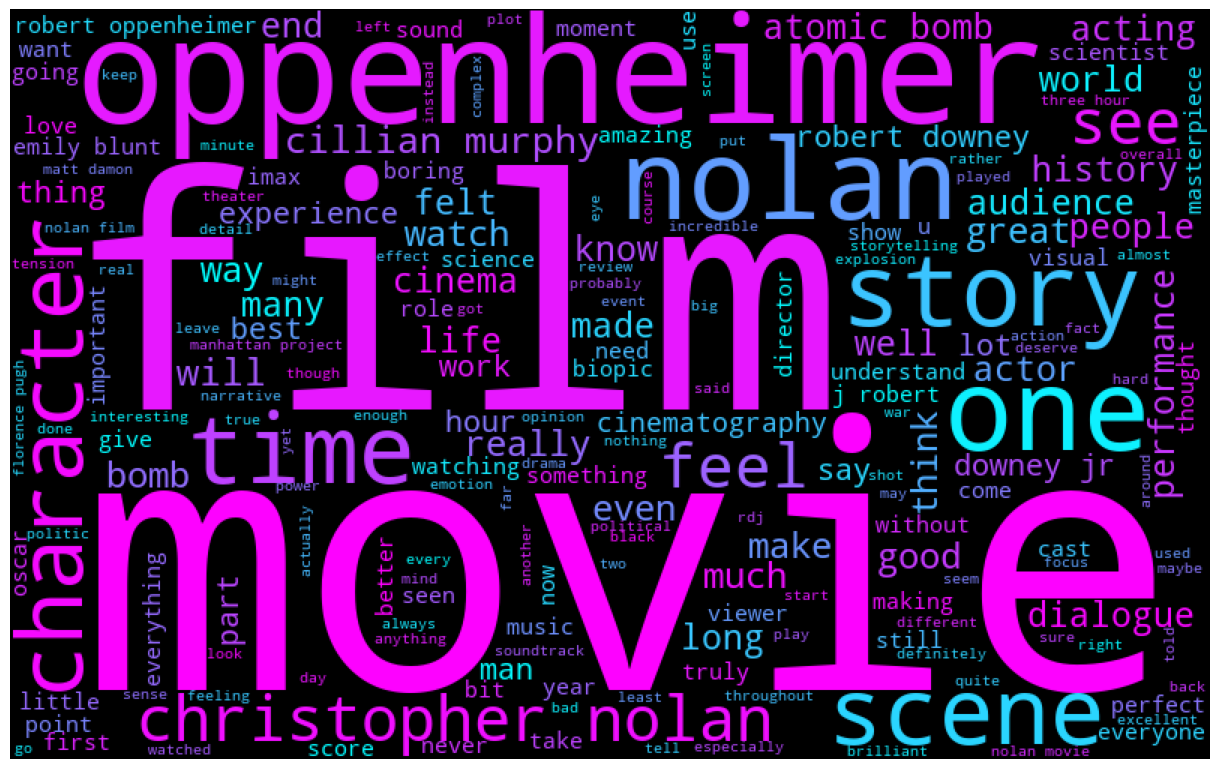

In [9]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.review:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
color_map = 'cool'
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='black',colormap=color_map,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

#plotting the WordCloud image
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

### <font color='#e50808'>The Word Cloud analysis indicates that the name "Oppenheimer" has been prominently mentioned and is considered an integral part of the movie. The audience seems to appreciate and praise the contribution of "Oppenheimer" to the film. The Word Cloud visually represents the frequency and importance of words in the text data, with "Oppenheimer" standing out as a significant and well-regarded element in the movie, according to audience sentiment.</font>

# <font color='#e53d31'>2.2. Rating Counts</font>

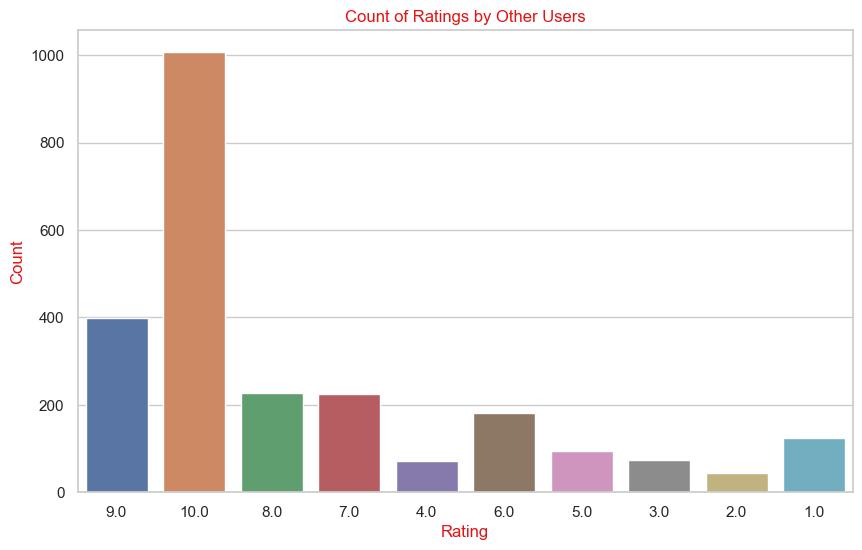

In [10]:
# Set the style for the plot (optional but can improve visual appeal)
sns.set(style = "whitegrid")

# Create the count plot
plt.figure(figsize = (10, 6))  # Adjust the figure size as needed
sns.countplot(data = df, x = 'rating')

# Add labels and title
plt.xlabel('Rating',color='#e31313')
plt.ylabel('Count',color='#e31313')
plt.title('Count of Ratings by Other Users',color='#e31313')

# Display the plot
plt.show()

### It can be observed that reviews with rating as 10 are highest. The movie has overall good rating.


### Rule-based Approach
This is a practical approach for analyzing text without training or using Machine Learning models. The result of this approach is a set of rules based on which the text is labelled as positive/neutral/negative. These rules are also called Lexicons and the approach is Lexicons based approach.

# <font color='#e53d31'>3. Data Pre-Processing Steps</font>
 1. Cleaning the Text
 2. Tokenization
 3. Enrichment - POS tagging
 4. Stopwords Removal
 5. Obtaining the Stem Words (Stemming and Lemmatization)

## <font color='#e53d31'>3.1. Cleaning the Text</font>
We will utilize the regular expressions `re` to remove non-alphabetic characters and numericals, leaving behind only the alphabets in the text. 

In [11]:
import re # regular expression for pattern matching and text manipulation.

# defining a function to clean the text
def clean(text):
    # removing all the special characters and numericals leaving with alphabets
    text = re.sub('[^A-Za-z]',' ', str(text))
    return text

# cleaning the text in review column
df['Cleaned_reviews'] = df['review'].apply(clean)
df.head()

,title,rating,review,Cleaned_reviews
0,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Greetings again from the darkness As pupils s...
1,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer the creator of Atomic...
2,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Everybody involved with the production of Opp...
3,"His eyes look full of fear, regrets and guilt!",10.0,Imagine a fire that you brought from the heave...,Imagine a fire that you brought from the heave...
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,As VFX and special effects take over the tradi...


## <font color='#e53d31'>3.2. Tokenization</font>
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).
## <font color='#e53d31'>3.3. Enrichment - POS tagging</font>
Part-of-Speech (POS) tagging is performed using the pos_tag function from the nltk library. It assigns a part-of-speech tag (like noun, verb, adjective, etc.) to each word in the tokenized review.                                
POS tagging is essential to preserve the context of the word and is essential for Lemmatization.
## <font color='#e53d31'>1.4. Stopwords Removal</font>
Stopwords in English are words that carry very little useful information. They are common words like "the," "is," "and," etc., that occur frequently in the text but carry little or no meaning.                               
We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.
## <font color='#e53d31'>1.5. Obtaining the Stem Words (Stemming and Lemmatization)</font>
Stemming and Lemmatization are techniques used to reduce words to their base or root form.               
The key difference is :

**Stemming often gives some meaningless root words as it simply chops off some characters in the end.** 

**Lemmatization gives meaningful root words, however, it requires POS tags of the words.**

# <font color='#e53d31'>NLTK</font>
NLTK (Natural Language Toolkit) stands as a leading platform, empowering Python developers to efficiently handle human language data. It offers intuitive interfaces, providing access to an extensive collection of over 50 corpora and lexical resources, including the esteemed WordNet.

One of NLTK's key strengths lies in its comprehensive suite of text processing libraries, equipped to handle tasks like classification, tokenization, stemming, tagging, parsing, and semantic reasoning. Additionally, it simplifies integration with robust Natural Language Processing (NLP) libraries used in industrial applications.

The versatility of NLTK makes it a compelling choice for professionals seeking to delve into advanced language analysis and harness the potential of human language data for a myriad of applications.

In [12]:
import nltk

#nltk.download('punkt') # downloading punkt tokeziner
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model
for abbreviation words, collocations, and words that start sentences. """

from nltk.tokenize import word_tokenize # importing word_tokenize package using nltk.tokenize library
from nltk import pos_tag # part_of_speech tag for converting each token into a tuple having form(word, tag)

#nltk.download('stopwords') # downloading Stopwords 
from nltk.corpus import stopwords # importing stopwords for removing meaningless text

#nltk.download('wordnet') # downloading wordnet 
from nltk import wordnet

In [13]:
# POS tagger dictionary
pos_dict = {'J': wordnet.wn.ADJ, 'V':wordnet.wn.VERB, 'N':wordnet.wn.NOUN, 'R':wordnet.wn.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print tags
    
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            #print(tag[0])
            #print(pos_dict.get(tag[0]))
    return newlist

df['POS_tagged'] = df['Cleaned_reviews'].apply(token_stop_pos)
df.head()

,title,rating,review,Cleaned_reviews,POS_tagged
0,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Greetings again from the darkness As pupils s...,"[(Greetings, n), (darkness, n), (pupils, n), (..."
1,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer the creator of Atomic...,"[(Dr, n), (J, n), (Robert, n), (Oppenheimer, n..."
2,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Everybody involved with the production of Opp...,"[(Everybody, n), (involved, v), (production, n..."
3,"His eyes look full of fear, regrets and guilt!",10.0,Imagine a fire that you brought from the heave...,Imagine a fire that you brought from the heave...,"[(Imagine, v), (fire, n), (brought, v), (heave..."
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,As VFX and special effects take over the tradi...,"[(VFX, n), (special, a), (effects, n), (take, ..."


In [14]:
# Obtaining the stem words - Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lem = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_new = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_new = lemma_new + " " + lemma
        else:
            lemma = wordnet_lem.lemmatize(word, pos=pos)
            lemma_new = lemma_new + " " + lemma
    return lemma_new

df['Lemma'] = df['POS_tagged'].apply(lemmatize)
df.head()

,title,rating,review,Cleaned_reviews,POS_tagged,Lemma
0,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Greetings again from the darkness As pupils s...,"[(Greetings, n), (darkness, n), (pupils, n), (...",Greetings darkness pupil slouch school desk ...
1,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer the creator of Atomic...,"[(Dr, n), (J, n), (Robert, n), (Oppenheimer, n...",Dr J Robert Oppenheimer creator Atomic Bomb ...
2,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Everybody involved with the production of Opp...,"[(Everybody, n), (involved, v), (production, n...",Everybody involve production Oppenheimer wor...
3,"His eyes look full of fear, regrets and guilt!",10.0,Imagine a fire that you brought from the heave...,Imagine a fire that you brought from the heave...,"[(Imagine, v), (fire, n), (brought, v), (heave...",Imagine fire bring heaven give fire human fi...
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,As VFX and special effects take over the tradi...,"[(VFX, n), (special, a), (effects, n), (take, ...",VFX special effect take traditional filmmaki...


In [15]:
df[['review','Lemma']]

,review,Lemma
0,Greetings again from the darkness. As pupils s...,Greetings darkness pupil slouch school desk ...
1,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer creator Atomic Bomb ...
2,Everybody involved with the production of 'Opp...,Everybody involve production Oppenheimer wor...
3,Imagine a fire that you brought from the heave...,Imagine fire bring heaven give fire human fi...
4,As VFX and special effects take over the tradi...,VFX special effect take traditional filmmaki...
...,...,...
2441,"Well, as you know, nolan's mind can not think ...",Well know nolan mind think linear might time...
2442,Cinematography in states is in crisis for deca...,Cinematography state crisis decade budget fi...
2443,"I suppose these reviews are tweaked, otherwise...",suppose review tweaked otherwise explain unr...
2444,When there was nothing left to sell in the cin...,nothing leave sell cinema start put forward ...


# <div style="text-align:center"><h1><font color='#e53d31'>Sentiment Analysis Using VADER</font></h1></div>
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a popular lexicon and rule-based sentiment analysis tool. Developed for analyzing social media texts and informal language data, VADER utilizes a pre-labeled lexicon of words with sentiment scores, distinguishing between positive, negative, and neutral words.                                                           

VADER is widely used for quick sentiment analysis, particularly in informal text settings such as social media platforms. Although it offers simplicity and convenience, considering the context and nature of the text is essential for optimal performance.

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [17]:
# function to calculate vader Sentiment
def vadersia(review):
    vs = sia.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersia)
df.head()

,title,rating,review,Cleaned_reviews,POS_tagged,Lemma,Sentiment
0,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Greetings again from the darkness As pupils s...,"[(Greetings, n), (darkness, n), (pupils, n), (...",Greetings darkness pupil slouch school desk ...,0.9981
1,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Dr J Robert Oppenheimer the creator of Atomic...,"[(Dr, n), (J, n), (Robert, n), (Oppenheimer, n...",Dr J Robert Oppenheimer creator Atomic Bomb ...,0.9785
2,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Everybody involved with the production of Opp...,"[(Everybody, n), (involved, v), (production, n...",Everybody involve production Oppenheimer wor...,0.9991
3,"His eyes look full of fear, regrets and guilt!",10.0,Imagine a fire that you brought from the heave...,Imagine a fire that you brought from the heave...,"[(Imagine, v), (fire, n), (brought, v), (heave...",Imagine fire bring heaven give fire human fi...,0.8805
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,As VFX and special effects take over the tradi...,"[(VFX, n), (special, a), (effects, n), (take, ...",VFX special effect take traditional filmmaki...,0.8750


In [21]:
df['rating'] = df['rating'].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2446 entries, 0 to 2445
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2446 non-null   object 
 1   rating           2446 non-null   float64
 2   review           2446 non-null   object 
 3   Cleaned_reviews  2446 non-null   object 
 4   POS_tagged       2446 non-null   object 
 5   Lemma            2446 non-null   object 
 6   Sentiment        2446 non-null   float64
dtypes: float64(2), object(5)
memory usage: 133.9+ KB


In [22]:
# Compound Analysis based on Sentiment Score and Ratings
def vader_analysis(compound, rating):
    if compound >= 0.6 and rating >= 6.0:
        return 'Positive'
    elif compound < 0.2 and rating <= 3.0:
        return 'Negative'
    else:
        return 'Neutral'

# Assuming you have the 'Sentiment' and 'Rating' columns in your DataFrame
df['Analysis'] = df.apply(lambda row: vader_analysis(row['Sentiment'], row['rating']), axis=1)

In [23]:
df = df.drop(['Cleaned_reviews','POS_tagged','Lemma','Sentiment'], axis=1)
df

,title,rating,review,Analysis
0,superior filmmaking and historical storytelling,9.0,Greetings again from the darkness. As pupils s...,Positive
1,A sheer Brilliance of Christopher Nolan,10.0,Dr. J Robert Oppenheimer the creator of Atomic...,Positive
2,Fission. Fusion. Oscars.,8.0,Everybody involved with the production of 'Opp...,Positive
3,"His eyes look full of fear, regrets and guilt!",10.0,Imagine a fire that you brought from the heave...,Positive
4,Nolan at his best!,9.0,As VFX and special effects take over the tradi...,Positive
...,...,...,...,...
2441,"Now, this film is directed by old Nolan. ðŸ˜²",6.0,"Well, as you know, nolan's mind can not think ...",Neutral
2442,Just another blockbuster :(,1.0,Cinematography in states is in crisis for deca...,Negative
2443,Tweaked,6.0,"I suppose these reviews are tweaked, otherwise...",Positive
2444,Too bad,2.0,When there was nothing left to sell in the cin...,Neutral


In [24]:
vader_count = df['Analysis'].value_counts()
vader_count

Positive    1728
Neutral      609
Negative     109
Name: Analysis, dtype: int64

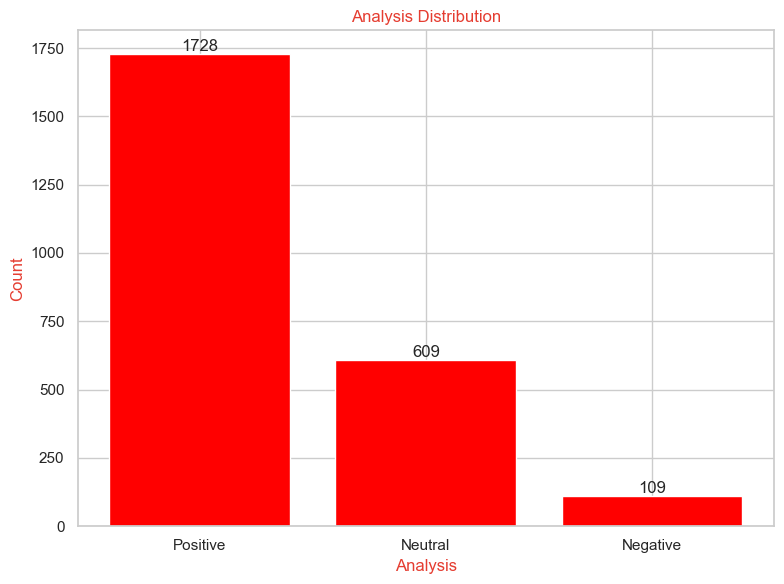

In [26]:
value_counts = df['Analysis'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(value_counts.index, value_counts.values, color='red')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Analysis',color = '#e53d31')
plt.ylabel('Count',color = '#e53d31')
plt.title('Analysis Distribution',color = '#e53d31')
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

In [30]:
df[df["Analysis"] == "Neutral"]

,title,rating,review,Analysis
5,Do the means justify the end?,8.0,Oppenheimer has always been regarded by Histor...,Neutral
6,What Walt's Watching,10.0,"""Oppenheimer"" or ""How the Father of the Atomic...",Neutral
7,When Particle Worlds Collide...,8.0,In a world that's problematic you're perplexin...,Neutral
9,no amount of dramatic music or quick cuts coul...,4.0,God what an absolute mess. To all the people s...,Neutral
10,Overall a disappointing experience.,8.0,"Although the time passed quickly, ultimately, ...",Neutral
...,...,...,...,...
2437,Oppenheimer: Creator of Atomic bomb and destro...,7.0,I expected more bomb making and testing than p...,Neutral
2440,Not what you would expected from a director of...,5.0,Atomic breakthrough is not shown but kept behi...,Neutral
2441,"Now, this film is directed by old Nolan. ðŸ˜²",6.0,"Well, as you know, nolan's mind can not think ...",Neutral
2444,Too bad,2.0,When there was nothing left to sell in the cin...,Neutral


([<matplotlib.patches.Wedge at 0x1a246e67550>,
 [Text(-0.6644886978077316, 0.8766155203313396, 'Positive'),
  Text(0.5356642001334537, -0.9607621270092755, 'Neutral'),
  Text(1.3367920916541784, -0.18837967961233784, 'Negative')],
 [Text(-0.36244838062239904, 0.47815392018073066, '70.6%'),
  Text(0.29218047280006565, -0.5240520692777866, '24.9%'),
  Text(0.8416839095600381, -0.11860942790406453, '4.5%')])

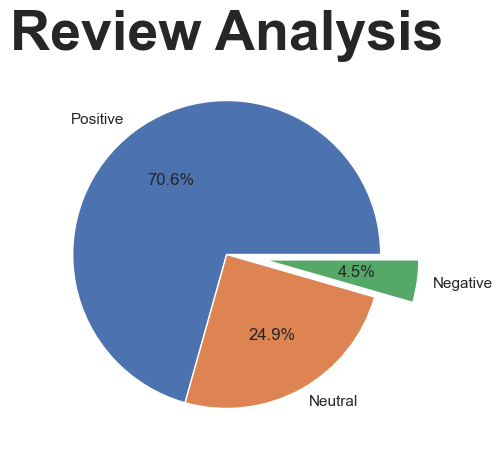

In [31]:
# importing matplotlib for Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,5))
plt.title('Review Analysis', fontweight = 'bold', fontsize = 40)
plt.pie(vader_count.values, labels=vader_count.index, explode = (0,0,0.25), autopct='%1.1f%%', shadow=False)